In [1]:
import numpy as np

# Parameters
n, p = 50, 40  # Dimensions of the matrix
noise_std = 0.1  # Standard deviation of the homoscedastic noise

# Generate two random vectors
u = np.random.rand(n)  # Vector of length n
v = np.random.rand(p)  # Vector of length p

# Create a rank-1 matrix as the outer product of u and v
rank_1_matrix = np.outer(u, v)

# Add homoscedastic Gaussian noise (constant variance across the matrix)
noise = np.random.normal(0, noise_std, size=(n, p))
noisy_matrix = rank_1_matrix + noise

# Print the original and noisy matrix
print("Rank-1 Matrix (Outer Product):")
print(rank_1_matrix)
print("\nNoisy Matrix (with Homoscedastic Noise):")
print(noisy_matrix)


Rank-1 Matrix (Outer Product):
[[0.12756719 0.16122258 0.27167016 ... 0.25765262 0.27777605 0.10367959]
 [0.07033983 0.08889723 0.1497974  ... 0.14206821 0.15316416 0.05716834]
 [0.07965541 0.10067049 0.16963609 ... 0.16088327 0.17344873 0.06473954]
 ...
 [0.08923033 0.11277151 0.19002706 ... 0.18022211 0.19429799 0.0725215 ]
 [0.18105324 0.22881959 0.38557535 ... 0.36568057 0.3942413  0.14715011]
 [0.07098205 0.08970888 0.15116509 ... 0.14336533 0.15456258 0.0576903 ]]

Noisy Matrix (with Homoscedastic Noise):
[[ 2.42164943e-01  3.57547557e-01  3.54129263e-01 ...  2.40887793e-01
   3.59386747e-01 -9.66780851e-02]
 [ 1.25412626e-01 -7.53502424e-02  8.63473255e-02 ...  6.83714281e-02
  -8.76865454e-02  1.07322689e-01]
 [ 4.58621220e-02  2.47533055e-01  8.36795912e-02 ...  1.45859974e-01
   3.05602172e-01  5.84920367e-02]
 ...
 [ 1.49828497e-01 -6.26148545e-03  1.90638521e-01 ...  1.46693043e-01
  -3.63391943e-04 -7.56355150e-02]
 [ 1.29890917e-01  1.52946658e-01  3.57213228e-01 ...  3.8

In [2]:
print(u)

[0.46325401 0.25543567 0.28926475 0.02295788 0.65321505 0.06403166
 0.60721385 0.8504657  0.47687444 0.98344822 0.88907968 0.61135761
 0.21558328 0.00292521 0.6445888  0.76022865 0.12876975 0.6075725
 0.5738352  0.57753324 0.26687616 0.80305299 0.81029367 0.34969266
 0.05662601 0.94000961 0.79725724 0.88686866 0.14705674 0.74756952
 0.07748869 0.86764107 0.5536866  0.85640528 0.15802391 0.78778197
 0.0536842  0.26034035 0.29235564 0.11630309 0.12783705 0.06990138
 0.56152095 0.49051701 0.76125286 0.62726177 0.74625073 0.32403558
 0.657486   0.25776785]


In [3]:
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [4]:
mycebmf= cEBMF(data    = noisy_matrix,
               prior_L = "exp",
               prior_F = "exp")
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

U, s, Vt = np.linalg.svd(mycebmf.data, full_matrices=False)
mycebmf.init_LF()
U
mycebmf.L
 

The array does not contain any missing values.


array([[-1.73492355e+00, -2.05231138e-01,  2.17384270e-01,
         3.05935201e-01,  5.85312057e-02],
       [-7.68959630e-01, -1.64087192e-01, -7.55653868e-02,
        -1.89747202e-01, -1.84404189e-01],
       [-1.11323356e+00, -5.21589766e-02, -4.01068276e-02,
        -6.82926119e-03,  1.91591845e-01],
       [-4.21047969e-02, -7.02913188e-02, -2.49212380e-01,
        -8.17891746e-02, -6.34662347e-02],
       [-2.53708729e+00,  2.01420714e-01,  1.17607164e-01,
         1.76276464e-01, -1.76600385e-01],
       [-1.01104296e-01, -1.79790056e-01, -2.30967814e-01,
         8.52623839e-02,  1.23177057e-01],
       [-2.12864134e+00,  3.87609491e-01, -5.85824790e-05,
         2.90843310e-01, -7.20624792e-02],
       [-2.99212080e+00,  7.71138547e-02, -9.19361091e-02,
         1.27721713e-01,  1.20449267e-01],
       [-1.53539650e+00, -8.07214462e-02, -2.96572391e-02,
         3.73946134e-02, -1.69312256e-01],
       [-3.44876898e+00,  3.10591794e-02,  9.11988607e-02,
        -1.46797160e-01

In [5]:
mycebmf.iter()


[[nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan n

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:237: RuntimeWarning: invalid value encountered in divide
  w = w / w.sum(axis=0, keepdims=True)  # Normalize by sum over k for each j
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\posterior_computation.py:85: RuntimeWarning: overflow encountered in exp
  wpost = w* np.exp( log_prob) / (sum(w *np.exp(log_prob)))


ValueError: cannot convert float NaN to integer

In [11]:
mycebmf= cEBMF(data    = noisy_matrix )
K=5
# Perform udv_si transformation
U, s, Vt = np.linalg.svd(noisy_matrix, full_matrices=False)

 
mycebmf.init_LF()
mycebmf.iter()

The array does not contain any missing values.
(50, 12)
(40, 13)
(50, 9)
(40, 9)
(50, 9)
(40, 9)
(50, 9)
(40, 9)
(50, 9)
(40, 9)


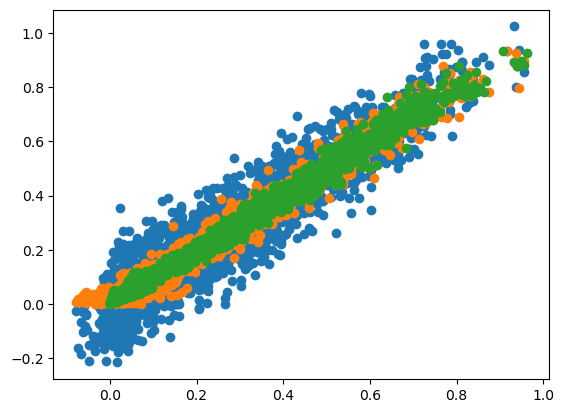

In [22]:
mycebmf.update_fitted_val()
plt.scatter(mycebmf.Y_fit, noisy_matrix)
 
plt.scatter(mycebmf.Y_fit, rank_1_matrix)
plt.scatter(np.outer(mycebmf.L[:,0],mycebmf.F[:,0] ), rank_1_matrix)